### Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
##### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_input = pd.read_csv('Credit_Risk_Train_Data.csv')
test_input = pd.read_csv('Credit_Risk_Validate_data.csv')


# Data Understanding

In [3]:
print(train_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
print(test_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [5]:
# renaming the outcome column to loan status beause we have to concat the two data present

test_input.rename(columns={'outcome':'Loan_Status'},inplace=True)


In [6]:
# joing the two data tables

data_all=pd.concat([train_input,test_input],ignore_index=True)

In [7]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [8]:
data_all.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


# Exploratory Data Analysis

### Missing Value Proprocessing

In [9]:
data_all.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: >

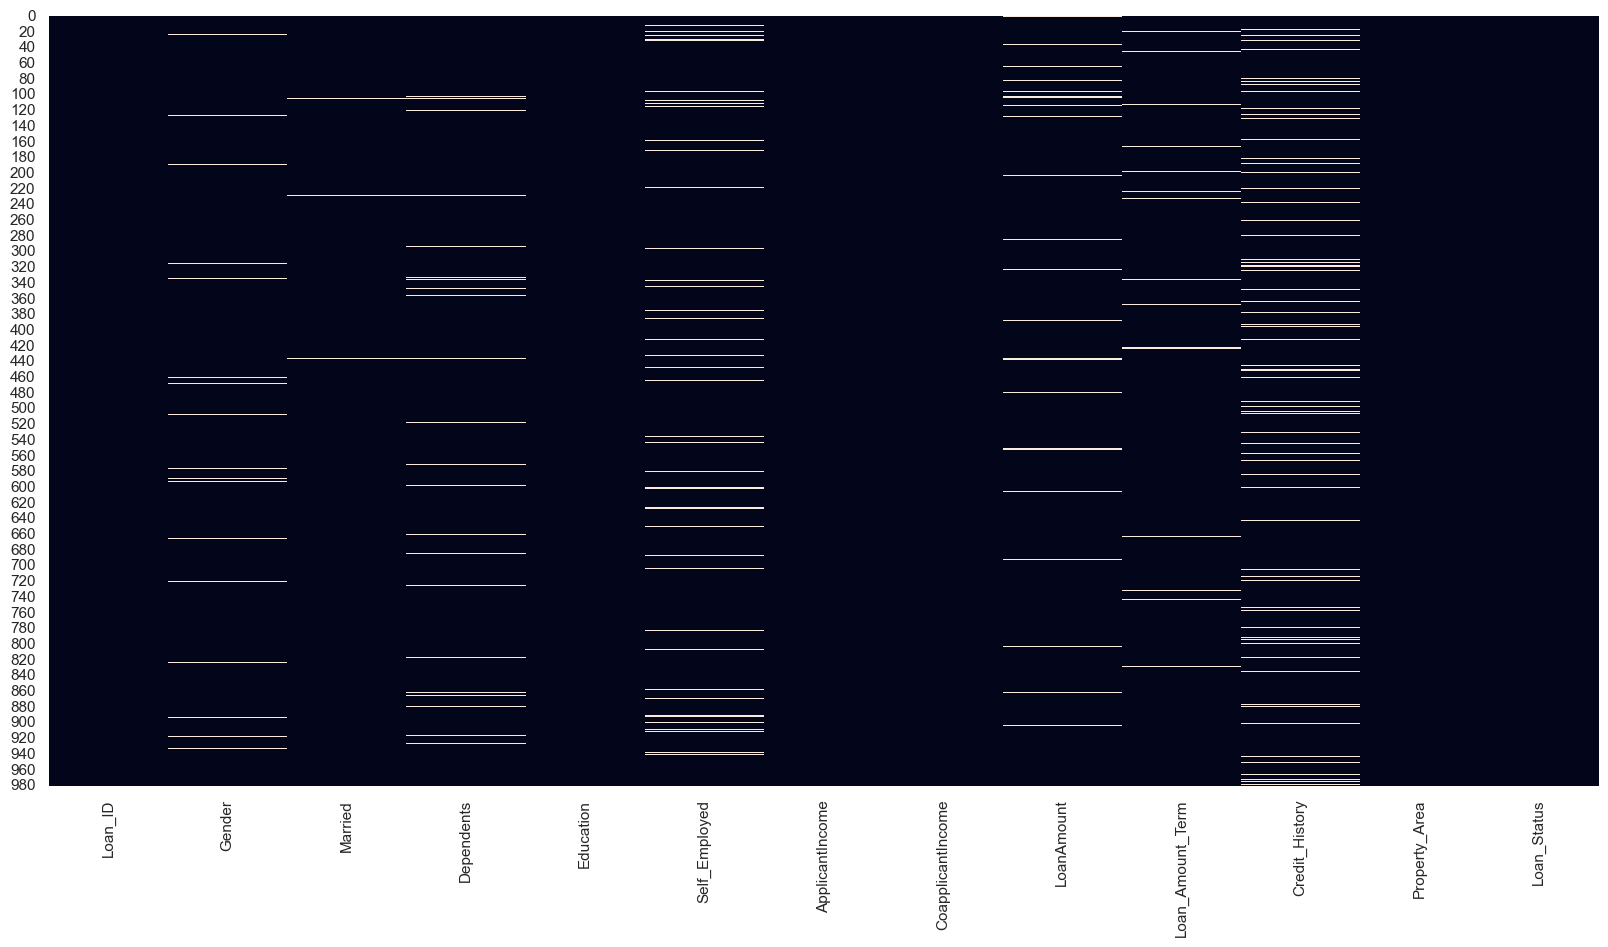

In [10]:
# Heat MAp showing the missing values

plt.figure(figsize=(20,10))

sns.heatmap(data_all.isnull(),cbar=False)

In [11]:
# gives the missing values of all columns

data_all.isnull().sum()  


Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# checking skweeness

data_all.skew()

ApplicantIncome      7.086961
CoapplicantIncome    6.844109
LoanAmount           2.714036
Loan_Amount_Term    -2.477392
Credit_History      -1.817102
dtype: float64

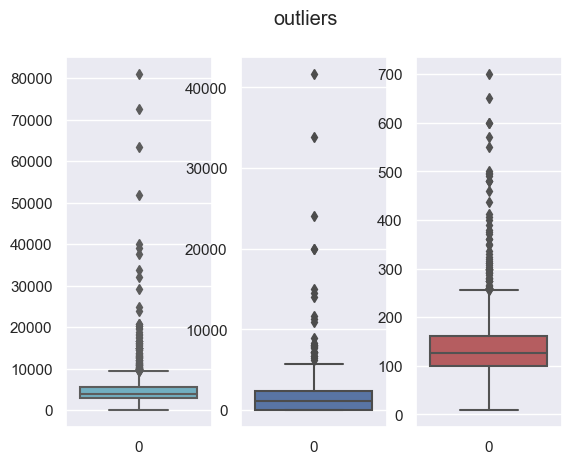

In [13]:
#lets visualize the outliers using Box plot

plt.subplot(1,3,1)
sns.boxplot(data_all['ApplicantIncome'], color="c")

plt.subplot(1,3,2)
sns.boxplot(data_all['CoapplicantIncome'], color="b")

plt.subplot(1,3,3)
sns.boxplot(data_all['LoanAmount'] , color="r")

plt.suptitle('outliers')
plt.show()

In [14]:
# describe for categorical data

discrete_categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',"Loan_Status"]


In [15]:
data_all[discrete_categorical].describe(include='all')

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,957,978,981,926,981,981
unique,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Semiurban,Y
freq,775,631,763,807,349,712


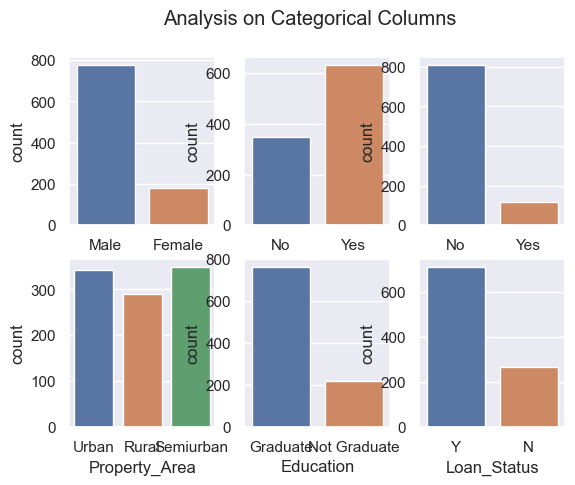

In [16]:
# Visualizing the count of each category

fig, axes = plt.subplots(2, 3)

plt.subplot(2, 3, 1)
sns.countplot(data=data_all, x="Gender")

plt.subplot(2, 3, 2)
sns.countplot(data=data_all, x="Married")

plt.subplot(2, 3, 3)
sns.countplot(data=data_all, x="Self_Employed")

plt.subplot(2, 3, 4)
sns.countplot(data=data_all, x="Property_Area")

plt.subplot(2, 3, 5)
sns.countplot(data=data_all, x="Education")

plt.subplot(2, 3, 6)
sns.countplot(data=data_all, x="Loan_Status")

plt.suptitle("Analysis on Categorical Columns")
plt.show()

# NAN fill with Mode

In [17]:
Counter(data_all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [18]:
data_all.fillna({'Gender':'Male'},inplace=True)

In [19]:
Counter(data_all['Gender'])

Counter({'Male': 799, 'Female': 182})

In [20]:
print(Counter(data_all['Married']))

Counter({'Yes': 631, 'No': 347, nan: 3})


In [21]:
data_all.fillna({'Married':'Yes'},inplace=True)

In [22]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

# NaN fill With Cross TAb

In [23]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [24]:
# Lets see the dependents with respect to marriage

pd.crosstab(data_all['Married'],data_all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [25]:
pd.crosstab(data_all['Dependents'],data_all['Married'])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [26]:
# for the bachlors lets fill the missing dependents as 0

# lets fing the index of all rows with dependents missing and married no

bachelor_nulldependents= data_all[(data_all['Married']=='No') &
                                 (data_all['Dependents'].isnull())].index.tolist()

print(bachelor_nulldependents)

[293, 332, 355, 597, 684, 752, 879, 916, 926]


In [27]:
data_all['Dependents'].iloc[bachelor_nulldependents]='0'

In [28]:
Counter(data_all['Dependents'])

Counter({'0': 554, '1': 160, '2': 160, '3+': 91, nan: 16})

In [29]:
# For the remaining 16 missing dependents,
# lests see how many dependents male and female have

pd.crosstab(data_all['Gender'],data_all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [30]:
pd.crosstab((data_all['Gender']=='Male')&
            (data_all['Married']=='Yes'),data_all['Dependents'])

Dependents,0,1,2,3+
row_0,,,,
False,318,48,23,15
True,236,112,137,76


In [31]:
# Lets fill the null ddependent with 1

data_all['Dependents'].iloc[data_all[data_all['Dependents'].isnull()].index.tolist()]='1'

In [32]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [34]:
data_all.fillna({'Self_Employed':'No'},inplace=True)

In [35]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

# Nan Filling with Mean

In [36]:
# to check if any row with both loanamount and loan_amoutn_term as nan

pd.crosstab(data_all['LoanAmount'].isnull(),
            data_all['Loan_Amount_Term'].isnull())

Loan_Amount_Term,False,True
LoanAmount,,
False,934,20
True,27,0


In [37]:
pd.crosstab(data_all['LoanAmount'].isnull(),data_all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [38]:
# mean of all unique loan amount term

data_all.groupby(data_all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [39]:
# lets fill the missing values in LoanAmount

data_all['LoanAmount'][(data_all['LoanAmount'].isnull())&
                  (data_all['Loan_Amount_Term']==360)]=144

data_all['LoanAmount'][(data_all['LoanAmount'].isnull())
                       &(data_all["Loan_Amount_Term"]==480)]=137


In [40]:
# filling reaming with mean 130

data_all['LoanAmount'][(data_all['LoanAmount'].isnull())]=130

In [41]:
# lests with loan amount term

(data_all["Loan_Amount_Term"]).value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [42]:
# lests fill the loan tenure by the mode i.e 360 as seen in cross tab 

data_all['Loan_Amount_Term'][data_all['Loan_Amount_Term'].isnull()]=360

In [43]:
data_all["Credit_History"].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [44]:
# replacing with mode i.e 1

data_all.fillna({'Credit_History':1},inplace=True)

In [45]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Modifying the data by adding two columns in one new column

In [46]:
data_all["Total_Family_Income"] = data_all["ApplicantIncome"] + data_all["CoapplicantIncome"]

data_all.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [47]:
data_all.skew()

LoanAmount             2.751997
Loan_Amount_Term      -2.513729
Credit_History        -1.953899
Total_Family_Income    6.042453
dtype: float64

In [48]:
# lets handle the skewness of data

from scipy.stats import boxcox


data_all['Total_Family_Income'],a = boxcox(data_all['Total_Family_Income'])

data_all['LoanAmount'],c=boxcox(data_all['LoanAmount'])


In [49]:
data_all.skew()

LoanAmount             0.029208
Loan_Amount_Term      -2.513729
Credit_History        -1.953899
Total_Family_Income   -0.041866
dtype: float64

In [50]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Family_Income
0,LP001002,Male,No,0,Graduate,No,6.050012,360.0,1.0,Urban,Y,1.891261
1,LP001003,Male,Yes,1,Graduate,No,5.878340,360.0,1.0,Rural,N,1.891691
2,LP001005,Male,Yes,0,Graduate,Yes,4.941272,360.0,1.0,Urban,Y,1.882709
3,LP001006,Male,Yes,0,Not Graduate,No,5.784929,360.0,1.0,Urban,Y,1.889374
4,LP001008,Male,No,0,Graduate,No,6.019212,360.0,1.0,Urban,Y,1.891532


In [51]:
data_all['Loan_Amount_Term'] = data_all['Loan_Amount_Term']/12

In [52]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Family_Income
0,LP001002,Male,No,0,Graduate,No,6.050012,30.0,1.0,Urban,Y,1.891261
1,LP001003,Male,Yes,1,Graduate,No,5.878340,30.0,1.0,Rural,N,1.891691
2,LP001005,Male,Yes,0,Graduate,Yes,4.941272,30.0,1.0,Urban,Y,1.882709
3,LP001006,Male,Yes,0,Not Graduate,No,5.784929,30.0,1.0,Urban,Y,1.889374
4,LP001008,Male,No,0,Graduate,No,6.019212,30.0,1.0,Urban,Y,1.891532


# CAtegorical Feature Engineering

In [53]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Family_Income
0,LP001002,Male,No,0,Graduate,No,6.050012,30.0,1.0,Urban,Y,1.891261
1,LP001003,Male,Yes,1,Graduate,No,5.878340,30.0,1.0,Rural,N,1.891691
2,LP001005,Male,Yes,0,Graduate,Yes,4.941272,30.0,1.0,Urban,Y,1.882709
3,LP001006,Male,Yes,0,Not Graduate,No,5.784929,30.0,1.0,Urban,Y,1.889374
4,LP001008,Male,No,0,Graduate,No,6.019212,30.0,1.0,Urban,Y,1.891532


In [54]:
data_all['Dependents'].value_counts()

0     554
1     176
2     160
3+     91
Name: Dependents, dtype: int64

In [55]:
# using label encoder for dependents column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data_all['Dependents'] = encoder.fit_transform(data_all['Dependents'])

In [56]:
# using get Dummis for remaming only for catogorical data because almost all have 2 categories only

data_all_new=pd.get_dummies(data_all.drop(["Loan_ID"],axis=1),drop_first=True)

In [57]:
data_all_new.head(10)

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Total_Family_Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,6.050012,30.0,1.0,1.891261,1,0,0,0,0,1,1
1,1,5.878340,30.0,1.0,1.891691,1,1,0,0,0,0,0
2,0,4.941272,30.0,1.0,1.882709,1,1,0,1,0,1,1
3,0,5.784929,30.0,1.0,1.889374,1,1,1,0,0,1,1
4,0,6.019212,30.0,1.0,1.891532,1,0,0,0,0,1,1
5,2,6.975766,30.0,1.0,1.895944,1,1,0,1,0,1,1
6,0,5.450643,30.0,1.0,1.886255,1,1,1,0,0,1,1
7,3,6.186341,30.0,0.0,1.890672,1,1,0,0,1,0,0
8,2,6.277048,30.0,1.0,1.890656,1,1,0,0,0,1,1
9,1,7.391166,30.0,1.0,1.901904,1,1,0,0,1,0,0


# train test split 

In [58]:
X = data_all_new.drop(["Loan_Status_Y"],axis=1)
y=data_all_new['Loan_Status_Y']

In [59]:
X.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Total_Family_Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,6.050012,30.0,1.0,1.891261,1,0,0,0,0,1
1,1,5.878340,30.0,1.0,1.891691,1,1,0,0,0,0
2,0,4.941272,30.0,1.0,1.882709,1,1,0,1,0,1
3,0,5.784929,30.0,1.0,1.889374,1,1,1,0,0,1
4,0,6.019212,30.0,1.0,1.891532,1,0,0,0,0,1


In [60]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8

In [61]:
Train =  []
Test = []
CV = []

for i in range (0,101):
    from sklearn.model_selection import train_test_split
    X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LogisticRegression
    log_default = LogisticRegression()
    log_default.fit(X_train,y_train)

    ypred_train = log_default.predict(X_train)
    ypred_test =  log_default.predict(X_test)

    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default,X_train,y_train,cv=5,scoring="accuracy").mean())
    
em = pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})   
gm = em[(abs(em['Train']-em['Test'])<=0.5) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("best random_state number:",rs)

best random_state number: 54


In [62]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [81]:
X_train.shape

(784, 11)

In [82]:
X_test.shape

(197, 11)

# Scaling Data

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
# fit only the traning data

scaler.fit(X)

StandardScaler()

In [86]:
# now apply the transformation to the data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X_train[:5]

array([[ 0.2106796 , -0.55620501,  0.2705276 ,  0.42151046, -0.42129618,
         0.47726799,  0.73980985, -0.53452248, -0.37155221,  1.34569248,
        -0.73158135],
       [ 0.2106796 ,  0.49780864,  0.2705276 ,  0.42151046, -0.86898697,
         0.47726799,  0.73980985, -0.53452248, -0.37155221,  1.34569248,
        -0.73158135],
       [-0.76421042, -1.36396715,  0.2705276 , -2.37242036, -0.33656774,
         0.47726799,  0.73980985,  1.87082869, -0.37155221, -0.74311183,
         1.36690199],
       [-0.76421042, -0.25832288,  0.2705276 ,  0.42151046, -0.07585741,
         0.47726799,  0.73980985, -0.53452248, -0.37155221,  1.34569248,
        -0.73158135],
       [-0.76421042, -1.1606632 ,  0.2705276 ,  0.42151046, -1.28951143,
         0.47726799, -1.35169869, -0.53452248, -0.37155221, -0.74311183,
         1.36690199]])

# Traning the models

### K-nn

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
clf = KNeighborsClassifier(metric='minkowski',n_neighbors=16,
                          weights='uniform')

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [101]:
confusion_matrix(y_test,y_pred)

array([[ 25,  31],
       [  1, 140]], dtype=int64)

In [102]:
accuracy_score(y_test,y_pred)

0.8375634517766497

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61        56
           1       0.82      0.99      0.90       141

    accuracy                           0.84       197
   macro avg       0.89      0.72      0.75       197
weighted avg       0.86      0.84      0.82       197



## Supoort Vector Machine

In [94]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":["linear","rbf","sigmoid","poly"]}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator, param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train= svm_model.predict(X_train)
ypred_test= svm_model.predict(X_test)

from sklearn.model_selection import cross_val_score
print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
print("cross validation score:", cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())


Train Accuracy: 0.875
Test Accuracy: 0.8375634517766497
cross validation score: 0.8673117752735587


In [79]:
conf_matrix_train = confusion_matrix(y_train, ypred_train)
conf_matrix_test = confusion_matrix(y_test, ypred_test)

print("\nConfusion Matrix (Training Data):")
print(conf_matrix_train)

print("\nConfusion Matrix (Test Data):")
print(conf_matrix_test)


Confusion Matrix (Training Data):
[[116  98]
 [  4 566]]

Confusion Matrix (Test Data):
[[ 24  31]
 [  4 138]]
